# **Credit Card Fraud Detection Case Study**

Submitted By,
<br>Sindhu L
<br>Meenakshi Sharma
<br>Dhemath Dhanraj

## Problem Statement
In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.
Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants

### Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Step 1: Importing Essential Libraries

In [2]:
# importing required libraries and filtering warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [4]:
# In order to view the results in all columns and rows
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

## STEP 2: Importing file and understanding data

In [5]:
# importing the required file
df_train=pd.read_csv("/content/gdrive/MyDrive/CreditCardDataset/fraudTrain.csv")
df_train1=pd.read_csv("/content/gdrive/MyDrive/CreditCardDataset/fraudTrain.csv")
df_test=pd.read_csv("/content/gdrive/MyDrive/CreditCardDataset/fraudTest.csv")
df_test1=pd.read_csv("/content/gdrive/MyDrive/CreditCardDataset/fraudTest.csv")

In [6]:
# verifying the file has been loaded properly; viewing first 5 records of dataframe
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
# verifying the file has been loaded properly; viewing first 5 records of dataframe
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
# to view last 5 records
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [9]:
# to view last 5 records
df_test.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [10]:
print("Train Dataset:",df_train.shape)
print("Test Dataset:",df_test.shape)

Train Dataset: (1296675, 23)
Test Dataset: (555719, 23)


In [11]:
# to understand dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [12]:
#to understand dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [13]:
# to understand data statistically
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [14]:
# to understand the data statistically
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


In [15]:
round(100*df_train.isnull().mean().sort_values(ascending=False),2)

,0
Unnamed: 0,0.0
zip,0.0
merch_long,0.0
merch_lat,0.0
unix_time,0.0
trans_num,0.0
dob,0.0
job,0.0
city_pop,0.0
long,0.0


In [16]:
round(100*df_test.isnull().mean().sort_values(ascending=False),2)

,0
Unnamed: 0,0.0
zip,0.0
merch_long,0.0
merch_lat,0.0
unix_time,0.0
trans_num,0.0
dob,0.0
job,0.0
city_pop,0.0
long,0.0


### Observations
* No Nulls present in data
* Few outliers can be seen in amt column; but we can investigate elaborately
* Data type is incorrect for trans_date_trans_time and dob column

### STEP 3: Data Pre-Processing

In [17]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [18]:
#Dropping unwanted columns for analysis
cols_to_drop=['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time']
df_train.drop(columns=cols_to_drop,inplace=True,axis=1)
df_test.drop(columns=cols_to_drop,inplace=True,axis=1)

In [19]:
#checking the shape of dataset after dropping unwanted columns for analysis
print(df_train.shape)
print(df_test.shape)

(1296675, 14)
(555719, 14)


In [20]:
# Changing incorrect Datatypes
df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['dob']=pd.to_datetime(df_train['dob'])
df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob']=pd.to_datetime(df_test['dob'])


In [21]:
# Deriving useful columns from existing columns
df_train['trans_month']=df_train['trans_date_trans_time'].dt.month #month column
df_train['trans_date']=pd.to_datetime(df_train['trans_date_trans_time'].dt.date) #date column
#df_train['trans_time'] = df_train['trans_date_trans_time'].dt.time # time column
df_train['trans_hour'] = df_train['trans_date_trans_time'].dt.hour #hour column
df_train['age'] = round((df_train['trans_date_trans_time'] - df_train['dob']).dt.days/365.25) #age column

df_test['trans_month']=df_test['trans_date_trans_time'].dt.month
df_test['trans_date']=pd.to_datetime(df_test['trans_date_trans_time'].dt.date)
#df_test['trans_time'] = df_test['trans_date_trans_time'].dt.time
df_test['trans_hour'] = df_test['trans_date_trans_time'].dt.hour
df_test['age'] = round((df_test['trans_date_trans_time'] - df_test['dob']).dt.days/365.25)


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [23]:
df_train.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_month', 'trans_date', 'trans_hour', 'age'],
      dtype='object')

In [24]:
# Finding number of unique values each column has
print(df_train.nunique().sort_values())

gender                         2
is_fraud                       2
trans_month                   12
category                      14
trans_hour                    24
state                         51
age                           83
job                          494
trans_date                   537
city_pop                     879
city                         894
dob                          968
lat                          968
long                         969
amt                        52928
merch_lat                1247805
trans_date_trans_time    1274791
merch_long               1275745
dtype: int64


In [25]:
# Segregating columns job,state,city
cat_cols=['category','gender','is_fraud','city','state','job']
num_cols=['amt','lat','long','city_pop','age','trans_month']

In [26]:
#Checking for data skewness
for i in cat_cols:
  print(df_train[i].value_counts(normalize=True))
  print("----------------------------------------")
  print("----------------------------------------")

category
gas_transport     0.101536
grocery_pos       0.095350
home              0.094947
shopping_pos      0.089978
kids_pets         0.087173
shopping_net      0.075225
entertainment     0.072504
food_dining       0.070535
personal_care     0.069993
health_fitness    0.066230
misc_pos          0.061430
misc_net          0.048807
grocery_net       0.035053
travel            0.031239
Name: proportion, dtype: float64
----------------------------------------
----------------------------------------
gender
F    0.547449
M    0.452551
Name: proportion, dtype: float64
----------------------------------------
----------------------------------------
is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64
----------------------------------------
----------------------------------------
city
Birmingham                   0.004332
San Antonio                  0.003956
Utica                        0.003937
Phoenix                      0.003914
Meridian                     0.003902
T

In [27]:
#Binning
# Job column has lots of redundant data ; trying to group them
# state column can be converted to zones
print(df_train['job'][df_train['job'].str.contains('(Scientist|scientist)',regex=True)].value_counts().sort_values(ascending=False))
print(df_test['job'][df_test['job'].str.contains('(Scientist|scientist)',regex=True)].value_counts().sort_values(ascending=False))

job
Scientist, audiological                                        7174
Scientist, research (maths)                                    6159
Audiological scientist                                         6118
Geoscientist                                                   5620
Research scientist (physical sciences)                         5185
Scientist, marine                                              5089
Scientist, biomedical                                          4130
Biomedical scientist                                           3080
Product/process development scientist                          3030
Soil scientist                                                 2579
Scientist, physiological                                       2087
Scientist, research (physical sciences)                        2043
Research scientist (life sciences)                             2030
Research scientist (maths)                                     1543
Physiological scientist                     

In [28]:
job_to_replace= [
    'Scientist, audiological',
    'Audiological scientist',
    'Scientist, research (maths)',
    'Geoscientist',
    'Scientist, marine',
    'Research scientist (physical sciences)',
    'Scientist, biomedical',
    'Product/process development scientist',
    'Biomedical scientist',
    'Soil scientist',
    'Research scientist (life sciences)',
    'Scientist, research (physical sciences)',
    'Scientist, physiological',
    'Physiological scientist',
    'Research scientist (maths)',
    'Scientist, research (medical)',
    'Research scientist (medical)',
    'Scientist, clinical (histocompatibility and immunogenetics)',
    'Water quality scientist',
    'Data scientist'
]
df_train['job'] = df_train['job'].replace(job_to_replace, 'Scientist')
df_test['job'] = df_test['job'].replace(job_to_replace, 'Scientist')

In [29]:
print(df_train['job'][df_train['job'].str.contains('(Designer|designer)',regex=True)].value_counts().sort_values(ascending=False))
print(df_test['job'][df_test['job'].str.contains('(Designer|designer)',regex=True)].value_counts().sort_values(ascending=False))

job
Exhibition designer              9199
Designer, ceramics/pottery       8225
Ceramics designer                4493
Designer, industrial/product     4129
Designer, jewellery              3083
Designer, furniture              3064
Designer, exhibition/display     3026
Web designer                     2556
Product designer                 2545
Industrial/product designer      2077
Glass blower/designer            2072
Furniture designer               2043
Designer, interior/spatial       1562
Set designer                     1545
Designer, multimedia             1053
Designer, textile                1045
Jewellery designer               1011
Designer, television/film set     534
Textile designer                  519
Interior and spatial designer     509
Name: count, dtype: int64
job
Exhibition designer              3968
Designer, ceramics/pottery       3463
Ceramics designer                2076
Designer, industrial/product     1727
Designer, exhibition/display     1352
Designer, furnit

In [30]:
job_to_replace = [
    'Exhibition designer',
    'Designer, ceramics/pottery',
    'Ceramics designer',
    'Designer, industrial/product',
    'Designer, exhibition/display',
    'Designer, furniture',
    'Designer, jewellery',
    'Product designer',
    'Web designer',
    'Furniture designer',
    'Glass blower/designer',
    'Industrial/product designer',
    'Set designer',
    'Designer, interior/spatial',
    'Jewellery designer',
    'Designer, textile',
    'Designer, multimedia',
    'Interior and spatial designer',
    'Textile designer',
    'Designer, television/film set'
]
df_train['job'] = df_train['job'].replace(job_to_replace, 'Designer')
df_test['job'] = df_test['job'].replace(job_to_replace, 'Designer')

In [31]:
print(df_train['job'][df_train['job'].str.contains('(manager|Manager)',regex=True)].value_counts().sort_values(ascending=False))
print(df_test['job'][df_test['job'].str.contains('(manager|Manager)',regex=True)].value_counts().sort_values(ascending=False))

job
Facilities manager                      3974
Call centre manager                     3581
Heritage manager                        3566
Travel agency manager                   3557
Television floor manager                3130
Tourist information centre manager      3086
Leisure centre manager                  3080
Production manager                      3067
Energy manager                          2918
Health service manager                  2559
Fitness centre manager                  2559
Pension scheme manager                  2088
Public house manager                    2038
Farm manager                            2032
Information systems manager             2021
Theme park manager                      1999
Theatre manager                         1555
Logistics and distribution manager      1549
Quarry manager                          1519
Records manager                         1517
Location manager                        1497
Stage manager                           1041
Retail

In [32]:
job_to_replace= [
    'Facilities manager',
    'Travel agency manager',
    'Heritage manager',
    'Call centre manager',
    'Energy manager',
    'Production manager',
    'Leisure centre manager',
    'Tourist information centre manager',
    'Television floor manager',
    'Fitness centre manager',
    'Health service manager',
    'Theme park manager',
    'Information systems manager',
    'Farm manager',
    'Public house manager',
    'Pension scheme manager',
    'Location manager',
    'Records manager',
    'Quarry manager',
    'Logistics and distribution manager',
    'Theatre manager',
    'Product manager',
    'Outdoor activities/education manager',
    'Art gallery manager',
    'Retail manager',
    'Stage manager',
    'Tour manager',
    'Purchasing manager',
    'Hotel manager',
    'Environmental manager',
    'Restaurant manager, fast food',
    'Catering manager',
    'Estate manager/land agent'
]

df_train['job'] = df_train['job'].replace(job_to_replace, 'Manager')
df_test['job'] = df_test['job'].replace(job_to_replace, 'Manager')

In [33]:
print(df_train['job'][df_train['job'].str.contains('(Professor|professor|Teacher|teacher|Lecturer|lecturer)',regex=True)].value_counts().sort_values(ascending=False))
print(df_test['job'][df_test['job'].str.contains('(Professor|professor|Teacher|teacher|Lecturer|lecturer)',regex=True)].value_counts().sort_values(ascending=False))

job
Secondary school teacher                  5609
Early years teacher                       5566
Special educational needs teacher         5099
Teacher, special educational needs        4594
Further education lecturer                4131
English as a second language teacher      4125
Lecturer, further education               3586
Private music teacher                     3561
Lecturer, higher education                2994
Teacher, secondary school                 2549
Teacher, early years/pre                  2487
Teacher, primary school                   1471
Teacher, English as a foreign language    1009
TEFL teacher                               533
Associate Professor                        530
Teacher, adult education                   514
Primary school teacher                     513
Professor Emeritus                         510
English as a foreign language teacher      496
Name: count, dtype: int64
job
Early years teacher                       2475
Secondary school teacher  

In [34]:
job_to_replace = [
    'Early years teacher','Secondary school teacher','Special educational needs teacher','Teacher, special educational needs','Further education lecturer',
    'English as a second language teacher','Private music teacher','Lecturer, further education','Lecturer, higher education','Teacher, early years/pre',
    'Teacher, secondary school','Teacher, primary school','Teacher, English as a foreign language','English as a foreign language teacher','TEFL teacher',
    'Primary school teacher','Teacher, adult education',
    'Associate Professor'
]
df_train['job'] = df_train['job'].replace(job_to_replace, 'Teacher')
df_test['job'] = df_test['job'].replace(job_to_replace, 'Teacher')

In [35]:
print(df_train['job'][df_train['job'].str.contains('(engineering|Engineer|engineer|Engineering)',regex=True)].value_counts().sort_values(ascending=False))
print(df_test['job'][df_test['job'].str.contains('(engineering|Engineer|engineer|Engineering)',regex=True)].value_counts().sort_values(ascending=False))

job
Materials engineer                       8270
Water engineer                           6164
Mining engineer                          6151
Energy engineer                          5668
Petroleum engineer                       5667
Engineer, automotive                     5634
Mechanical engineer                      5632
Electrical engineer                      5179
Drilling engineer                        5132
Engineer, biomedical                     5120
Chemical engineer                        5086
Engineer, production                     4632
Engineer, control and instrumentation    4586
Engineering geologist                    4088
Engineer, electronics                    3612
Engineer, mining                         3595
Structural engineer                      3558
Geologist, engineering                   3120
Site engineer                            3090
Electronics engineer                     3087
Manufacturing engineer                   3058
Engineer, land                

In [36]:
job_to_replace = [
    'Materials engineer', 'Mining engineer', 'Water engineer', 'Mechanical engineer','Engineer, automotive', 'Petroleum engineer', 'Energy engineer',
    'Chemical engineer','Engineer, biomedical', 'Drilling engineer', 'Electrical engineer','Engineer, control and instrumentation', 'Engineer, production','Engineering geologist', 'Structural engineer', 'Engineer, mining',
    'Engineer, electronics', 'Engineer, land', 'Manufacturing engineer', 'Site engineer','Electronics engineer', 'Geologist, engineering', 'Engineer, petroleum',
    'Maintenance engineer', 'Civil engineer, contracting', 'Engineer, technical sales','Communications engineer', 'Biomedical engineer', 'Engineer, drilling', 'Engineer, civil (contracting)', 'Aeronautical engineer', 'Engineer, maintenance','Control and instrumentation engineer', 'Production engineer', 'Network engineer',
    'Building services engineer', 'Engineer, communications', 'Engineer, agricultural','Manufacturing systems engineer', 'Engineer, building services',
    'Engineer, aeronautical', 'Engineer, broadcasting (operations)', 'Engineer, structural','Broadcast engineer', 'Engineer, materials', 'Engineer, manufacturing', 'Engineer, civil (consulting)', 'Software engineer', 'Engineer, water'
]
df_train['job'] = df_train['job'].replace(job_to_replace, 'Engineer')
df_test['job'] = df_test['job'].replace(job_to_replace, 'Engineer')

In [37]:
print(df_train['job'][df_train['job'].str.contains('(Surgeon|surgeon|doctor|Doctor|Psychologist|psychologist|psychotherapist|Psycho|psycho|physicist|Physicist|Psychiatrist|psychiatrist)',regex=True)].value_counts().sort_values(ascending=False))
print(df_test['job'][df_test['job'].str.contains('(Surgeon|surgeon|doctor|Doctor|Psychologist|psychologist|psychotherapist|Psycho|psycho|physicist|Physicist|Psychiatrist|psychiatrist)',regex=True)].value_counts().sort_values(ascending=False))

job
Psychologist, forensic              5476
Psychotherapist, child              5460
Counselling psychologist            4649
Educational psychologist            4517
Surgeon                             4138
Child psychotherapist               4095
Occupational psychologist           4079
Forensic psychologist               3617
Physicist, medical                  3580
Hospital doctor                     3573
Psychologist, counselling           3545
Tree surgeon                        3142
Health physicist                    3034
Doctor, general practice            2582
Doctor, hospital                    2554
Neurosurgeon                        2101
Psychologist, sport and exercise    2086
Psychiatrist                        2073
Sport and exercise psychologist     2065
Psychotherapist                     2048
Dance movement psychotherapist      2017
General practice doctor             2001
Medical physicist                   1578
Psychologist, clinical              1559
Geophysicist

In [38]:
job_to_replace = [
    'Psychotherapist, child',
    'Psychologist, forensic',
    'Educational psychologist',
    'Counselling psychologist',
    'Occupational psychologist',
    'Child psychotherapist',
    'Surgeon',
    'Psychologist, counselling',
    'Hospital doctor',
    'Physicist, medical',
    'Forensic psychologist',
    'Health physicist',
    'Tree surgeon',
    'Doctor, hospital',
    'Doctor, general practice',
    'General practice doctor',
    'Dance movement psychotherapist',
    'Sport and exercise psychologist',
    'Psychotherapist',
    'Psychologist, sport and exercise',
    'Neurosurgeon',
    'Geophysicist/field seismologist',
    'Psychologist, clinical',
    'Medical physicist',
    'Clinical psychologist',
    'Psychiatrist'
]
df_train['job'] = df_train['job'].replace(job_to_replace, 'Medical Professional')
df_test['job'] = df_test['job'].replace(job_to_replace, 'Medical Professional')


In [39]:
print(df_train['job'][df_train['job'].str.contains('(music|Music)',regex=True)].value_counts().sort_values(ascending=False))
print(df_test['job'][df_test['job'].str.contains('(music|Music)',regex=True)].value_counts().sort_values(ascending=False))

job
Musician            6178
Music tutor         3039
Music therapist     2562
Therapist, music    1542
Name: count, dtype: int64
job
Musician            2594
Music tutor         1353
Music therapist     1081
Therapist, music     661
Name: count, dtype: int64


In [40]:
df_train['job'] = df_train['job'].replace(['Musician','Music tutor','Music therapist'], 'Musician')
df_test['job'] = df_test['job'].replace(['Musician','Music tutor','Music therapist'], 'Musician')

In [41]:
df_train.job.value_counts()

,count
job,
Engineer,138945
Medical Professional,78097
Manager,61646
Scientist,61498
Designer,54290
Teacher,49367
Musician,11779
Film/video editor,9779
Naval architect,8684


In [42]:
df_test.job.value_counts()

,count
job,
Engineer,59333
Medical Professional,33822
Manager,26908
Scientist,26283
Designer,23289
Teacher,21631
Musician,5028
Film/video editor,4119
"Surveyor, land/geomatics",3756


In [43]:
#Function to bin the state column according to the zones
def binning_state(x):
    # East States
    if x['state'] in ['CT','DE','FL','GA','IN','KY','LA','MD','MA','MI','MN','MO','MS','NE','NJ','NY','OH','PA','RI','SC','TN','VA','WV']:
        return 'East'
    # South States
    elif x['state'] in ['AL','AR','DC','FL','KY','LA','MD','MS','NC','OK','SC','TX','VA','WV']:
        return 'South'
    # West States
    elif x['state'] in ['AK','AZ','CA','CO','HI','ID','MT','NV','NM','OR','UT','WA','WY']:
        return 'West'
    # North States
    else:
        return 'North'


In [44]:
df_train['state_bin'] = df_train.apply(lambda x: binning_state(x), axis=1)
print(df_train['state_bin'].value_counts())
df_test['state_bin'] = df_test.apply(lambda x: binning_state(x), axis=1)
print(df_test['state_bin'].value_counts())

state_bin
East     690327
South    227542
West     192544
North    186262
Name: count, dtype: int64
state_bin
East     295788
South     97173
West      82598
North     80160
Name: count, dtype: int64


In [45]:
df_train.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_month', 'trans_date', 'trans_hour', 'age',
       'state_bin'],
      dtype='object')

In [46]:
df_test.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_month', 'trans_date', 'trans_hour', 'age',
       'state_bin'],
      dtype='object')

In [47]:
#As we have binned few columns and derived the useful data, deleting the columns that is no more used for modeling
cols_to_drop = ['trans_date_trans_time','city','state','lat','long','dob','merch_lat','merch_long','trans_date']

df_train = df_train.drop(cols_to_drop,axis=1)
df_test = df_test.drop(cols_to_drop,axis=1)

df_train.head()

,category,amt,gender,city_pop,job,is_fraud,trans_month,trans_hour,age,state_bin
0,misc_net,4.97,F,3495,Medical Professional,0,1,0,31.0,South
1,grocery_pos,107.23,F,149,Teacher,0,1,0,41.0,West
2,entertainment,220.11,M,4154,Nature conservation officer,0,1,0,57.0,West
3,gas_transport,45.00,M,1939,Patent attorney,0,1,0,52.0,West
4,misc_pos,41.96,M,99,Medical Professional,0,1,0,33.0,East


In [48]:
print(df_train.shape)
print(df_test.shape)

(1296675, 10)
(555719, 10)


### STEP 4: Exploratory Data Analysis

### Univariate Analysis

In [49]:
num_cols=['amt','city_pop','age','trans_month','trans_hour']

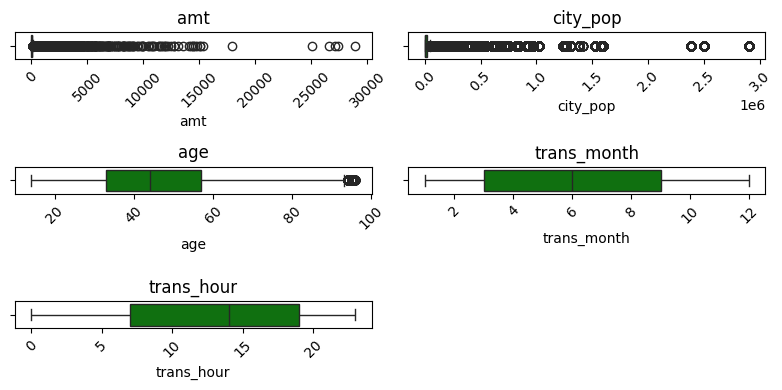

In [50]:
#Outlier Analysis
sns.color_palette("Paired")
plt.figure(figsize=(8,4))
for i in enumerate(num_cols):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=df_train[i[1]],palette=['green'])
    plt.title(i[1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####Observations:<br>
amt and city_pop columns has lots of outliers;
we can handle age, city_pop by binning them;
amt we dont want to handle for this case study

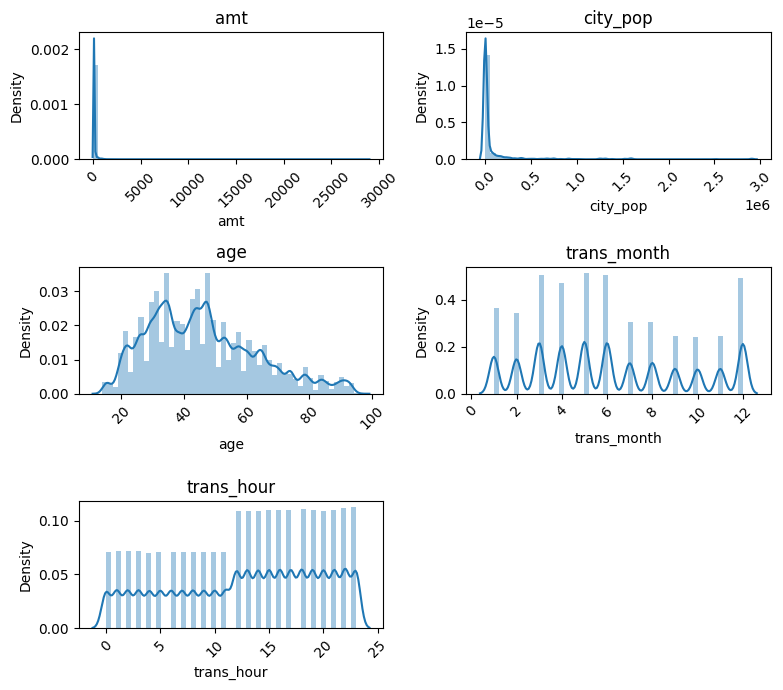

In [51]:
#Visualizing Skewness in numerical variables
sns.color_palette("Paired")
plt.figure(figsize=(8,7))
for i in enumerate(num_cols):
    plt.subplot(3,2,i[0]+1)
    sns.distplot(df_train[i[1]])
    plt.title(i[1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations: the data are highly skewed in amt, city_pop, age;

Age-Group
40-50    30352800
30-40    28870500
20-30    21380800
50-60    18493600
60-70    13187900
70+      13077700
0-20      4304200
Name: count, dtype: int64


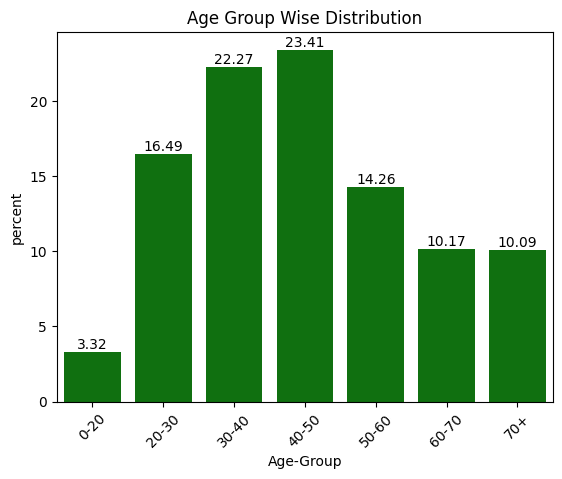

In [52]:
bins = [0,20,30,40,50,60,70,100]
slot = ['0-20','20-30', '30-40','40-50','50-60','60-70','70+']
df_train['Age-Group']= pd.cut(df_train['age'],bins,labels=slot)
df_test['Age-Group']= pd.cut(df_train['age'],bins,labels=slot)
print(100*(df_train["Age-Group"].value_counts().sort_values(ascending=False)))
ax=sns.countplot(x=df_train["Age-Group"],stat="percent",palette=['g'])
plt.title("Age Group Wise Distribution")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.show()

CityPop-Group
Very-Low         99387300
Above Average     8887900
High              8784700
Low               6012800
Average           3313400
Very High         2661300
Name: count, dtype: int64


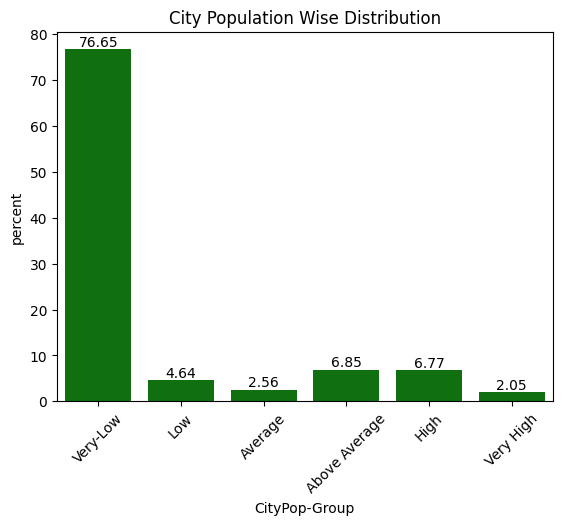

In [53]:
bins = [0,25000,50000,75000,200000,1000000,2500000]
slot = ['Very-Low','Low','Average','Above Average','High','Very High']
df_train['CityPop-Group']= pd.cut(df_train['city_pop'],bins,labels=slot)
df_test['CityPop-Group']= pd.cut(df_train['city_pop'],bins,labels=slot)
print(100*(df_train["CityPop-Group"].value_counts().sort_values(ascending=False)))
ax=sns.countplot(x=df_train["CityPop-Group"],stat="percent",palette=['g'])
plt.title("City Population Wise Distribution")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.show()

In [54]:
df_train.columns

Index(['category', 'amt', 'gender', 'city_pop', 'job', 'is_fraud',
       'trans_month', 'trans_hour', 'age', 'state_bin', 'Age-Group',
       'CityPop-Group'],
      dtype='object')

In [55]:
#dropping the columns which are not used for modelling
num_cols=['amt','trans_month','trans_hour']
cat_cols=['category','gender','is_fraud','state_bin','Age-Group','CityPop-Group']
cols_to_drop=['city_pop','job','age']
df_train.drop(columns=cols_to_drop,axis=1,inplace=True)
df_test.drop(columns=cols_to_drop,axis=1,inplace=True)

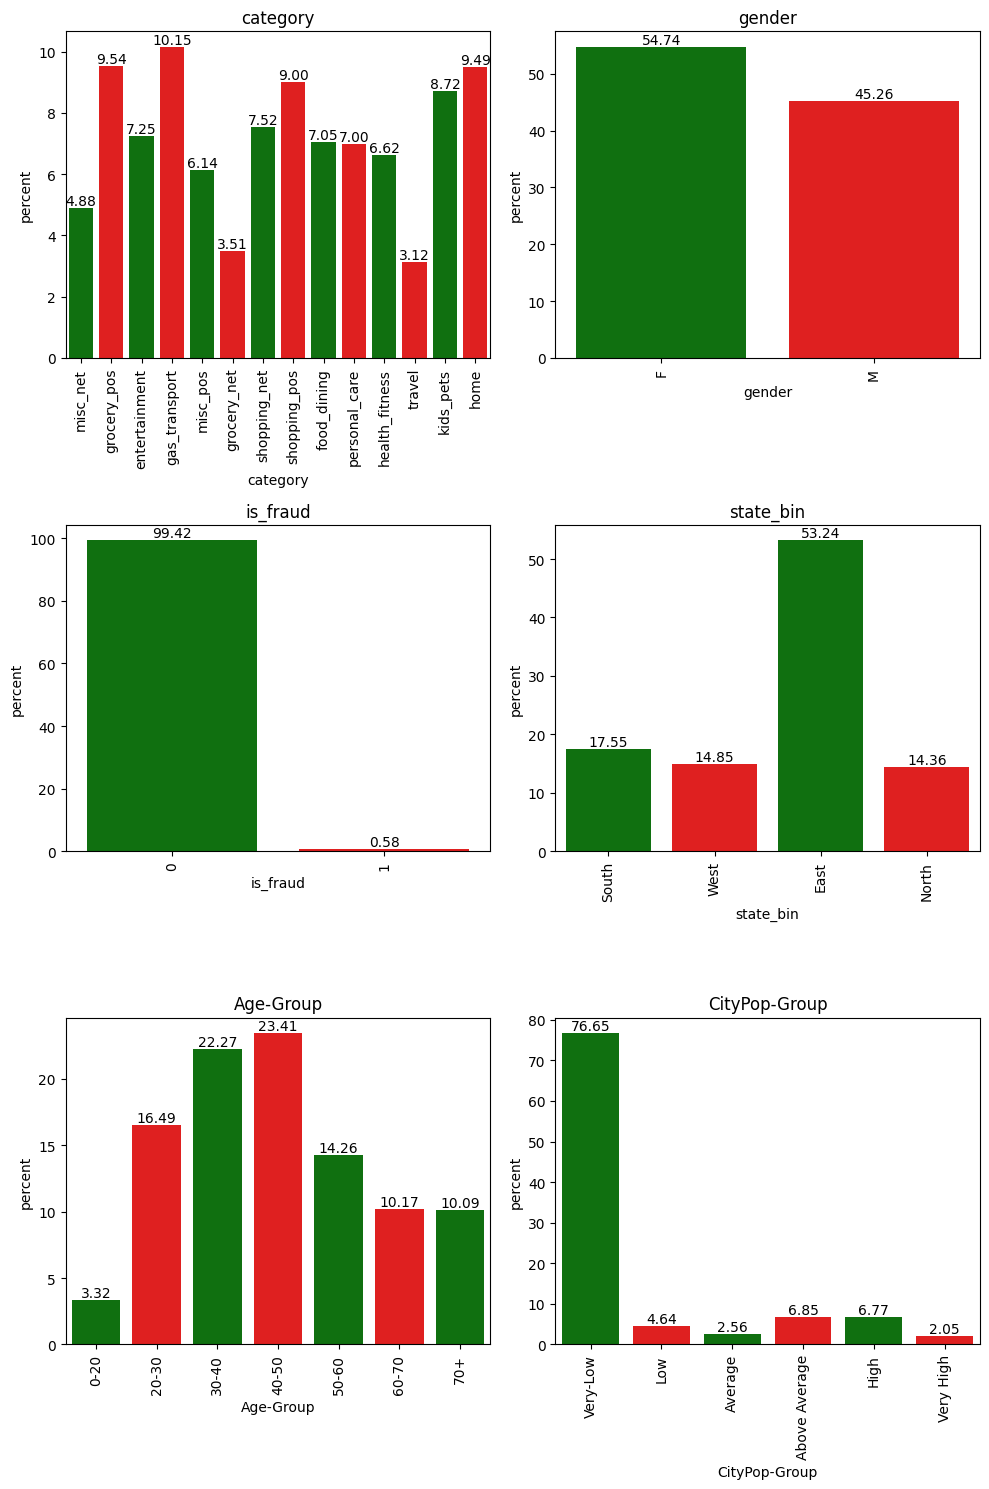

In [56]:
plt.figure(figsize=(10,15))
sns.set_palette("pastel")
for i in enumerate(cat_cols):
    plt.subplot(3,2,i[0]+1)
    ax=sns.countplot(x=df_train[i[1]],stat="percent",palette=['g','r'])
    plt.title(i[1])
    plt.xticks(rotation=90)
    for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.show()

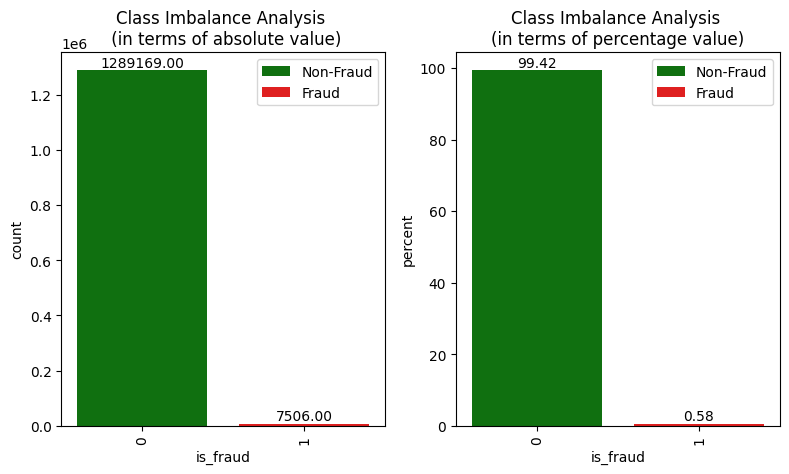

In [57]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title("Class Imbalance Analysis \n (in terms of absolute value)")
ax=sns.countplot(x=df_train["is_fraud"],palette=['g','r'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["Non-Fraud","Fraud"])
plt.subplot(1,2,2)
plt.title("Class Imbalance Analysis \n(in terms of percentage value)")
ax=sns.countplot(x=df_train["is_fraud"],stat="percent",palette=['g','r'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["Non-Fraud","Fraud"])
plt.tight_layout()
plt.show()

Class Imbalance is seen clearly with the ratio 171.75; 99.42% data has no fraud transaction

In [58]:
#Data imbalace ratio
df_train[df_train.is_fraud==0].shape[0]/df_train[df_train.is_fraud==1].shape[0]

171.75179856115108

In [59]:
#Separating the data into two datasets based on fraud and non-fraud
Non_fraud= df_train[df_train["is_fraud"]==0]
Fraud= df_train[df_train["is_fraud"]==1]

Plot for :  category


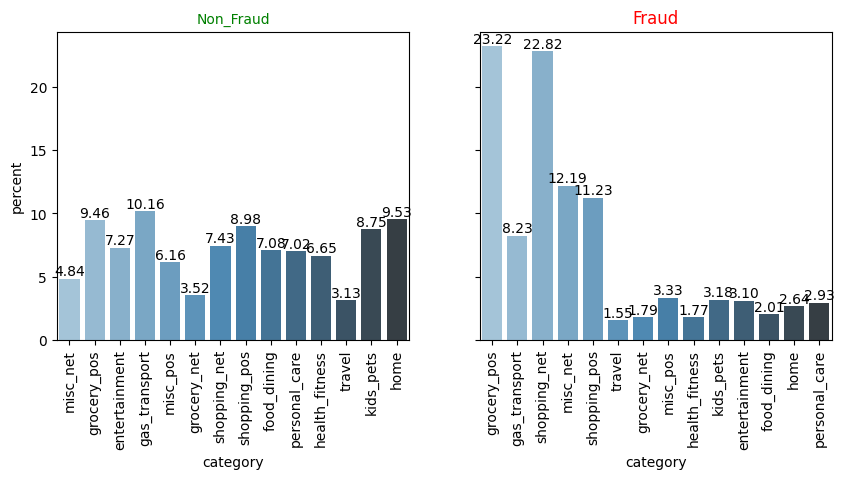

Plot for :  gender


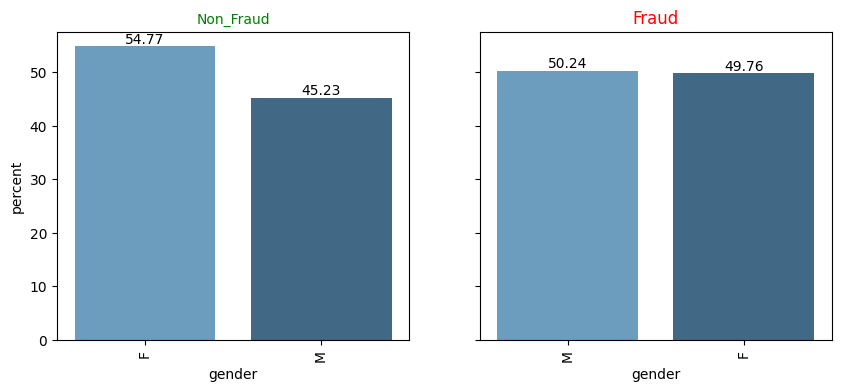

Plot for :  state_bin


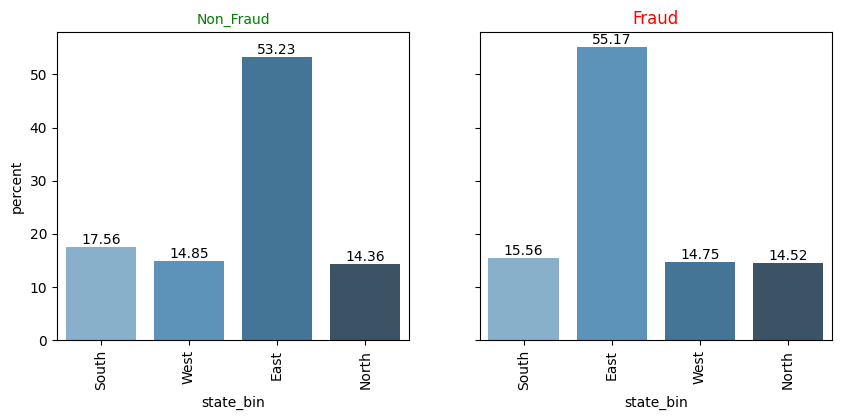

Plot for :  Age-Group


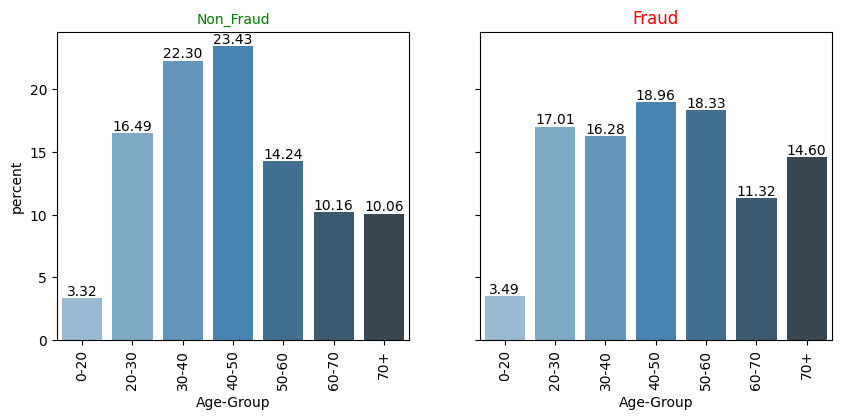

Plot for :  CityPop-Group


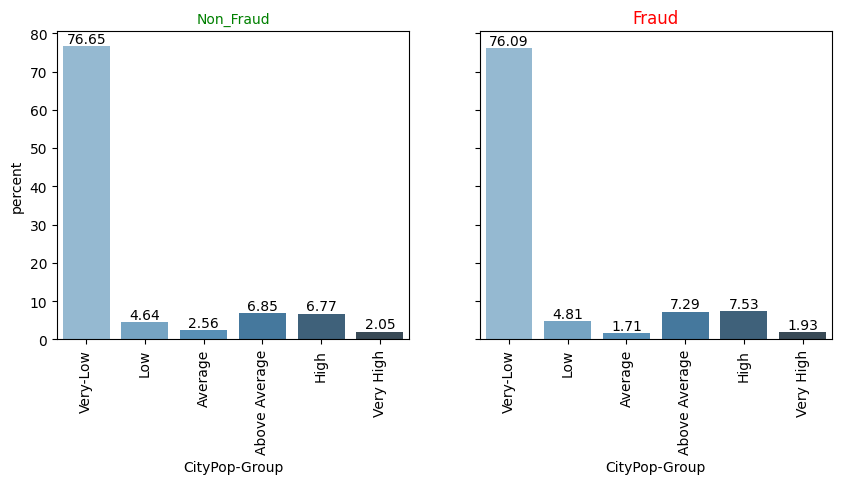

In [60]:
# univariate analysis for categorical_columns after dividing datasets
cat_cols=['category','gender','state_bin','Age-Group','CityPop-Group']
for i in cat_cols:
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4),sharey=True)
    print("Plot for : ",i)
    plot1=sns.countplot(x=Non_fraud[i],stat="percent" ,ax=ax1, palette="Blues_d")
    plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
    plot1.axes.set_title('Non_Fraud',fontsize= 10,fontweight= 7,color='Green')
    for container in plot1.containers:
        plot1.bar_label(container,fmt='%.2f')

    plot2=sns.countplot(x=Fraud[i],stat="percent" ,ax=ax2, palette="Blues_d")
    plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90)
    plot2.axes.set_title('Fraud',fontsize= 12,fontweight= 7,color='Red')
    for container in plot2.containers:
        plot2.bar_label(container,fmt='%.2f')

    plt.show()

not much difference seen in data; in age group the fraud is happening slightly higher for customers who are at 40-50 age

In [61]:
num_cols=['amt','trans_month','trans_hour']

Plot for :  amt


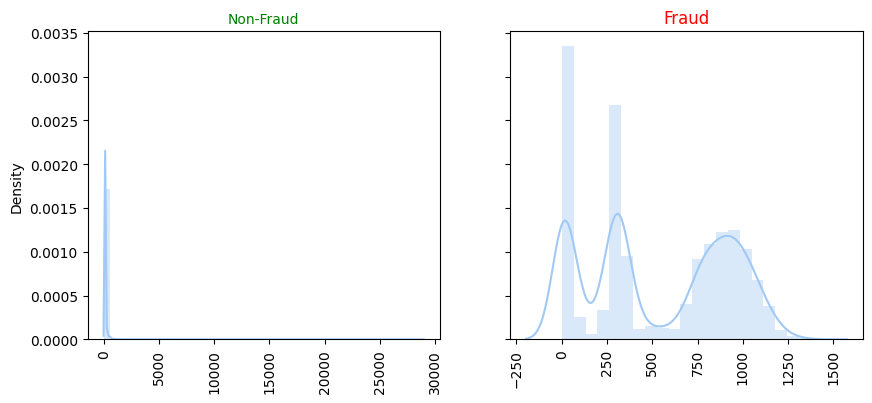

Plot for :  trans_month


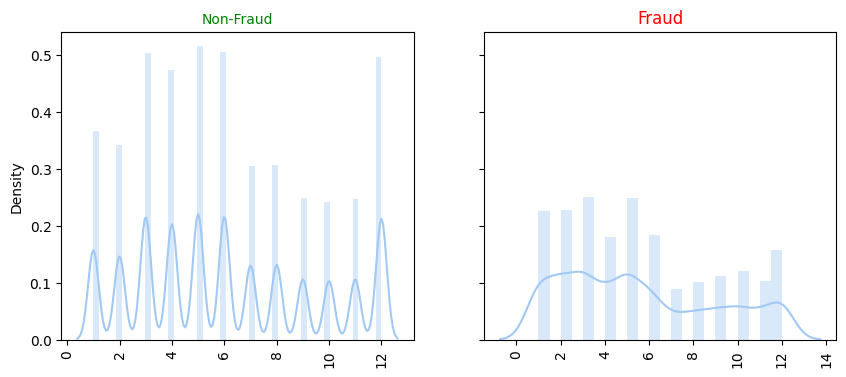

Plot for :  trans_hour


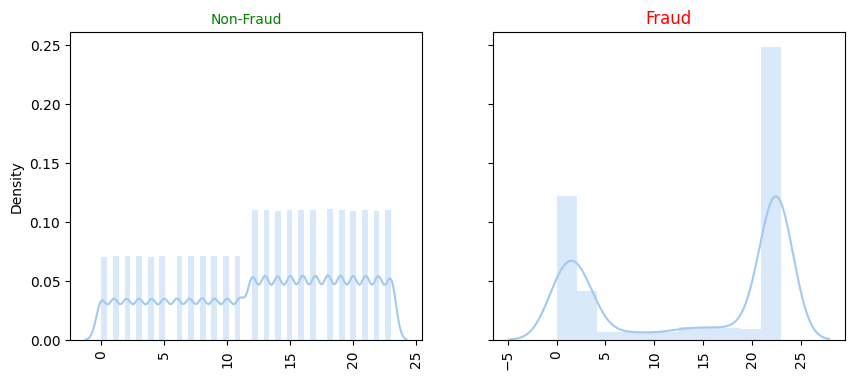

In [62]:
# univariate analysis for numerical columns after dividing datasets
for i in num_cols:
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4),sharey=True)
    print("Plot for : ",i)
    plot1=sns.distplot(x=Non_fraud[i] ,ax=ax1)
    plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
    plot1.axes.set_title('Non-Fraud',fontsize= 10,fontweight= 7,color='Green')

    plot2=sns.distplot(x=Fraud[i] ,ax=ax2)
    plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90)
    plot2.axes.set_title('Fraud',fontsize= 12,fontweight= 7,color='Red')

    plt.show()

*fraud is happening slightly higher in early mornings and late nights comparitively
*others doesnt show much diffrence


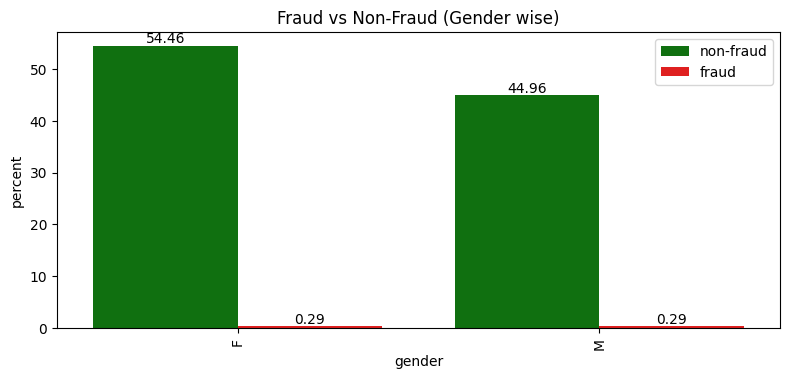

In [63]:
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.title("Fraud vs Non-Fraud (Gender wise)")
ax=sns.countplot(x=df_train["gender"],stat="percent",hue=df_train["is_fraud"],palette=['g','r'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["non-fraud","fraud"])
plt.tight_layout()
plt.show()

fraud transactions happens more for male customers comparitively

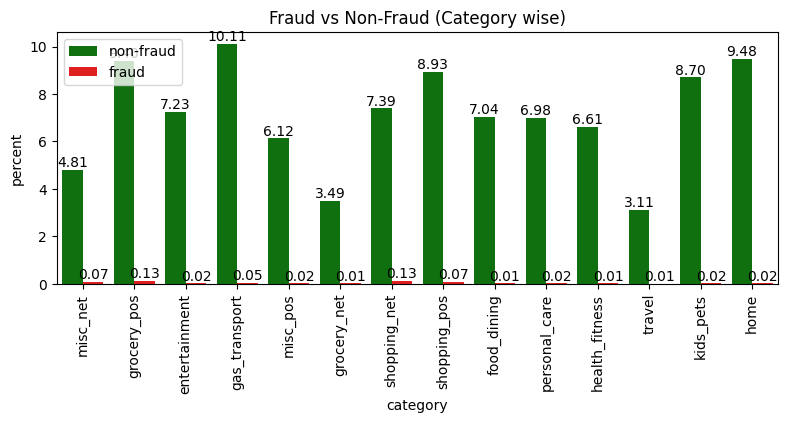

In [64]:
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.title("Fraud vs Non-Fraud (Category wise)")
ax=sns.countplot(x=df_train["category"],stat="percent",hue=df_train["is_fraud"],palette=['g','r'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["non-fraud","fraud"])
plt.tight_layout()
plt.show()

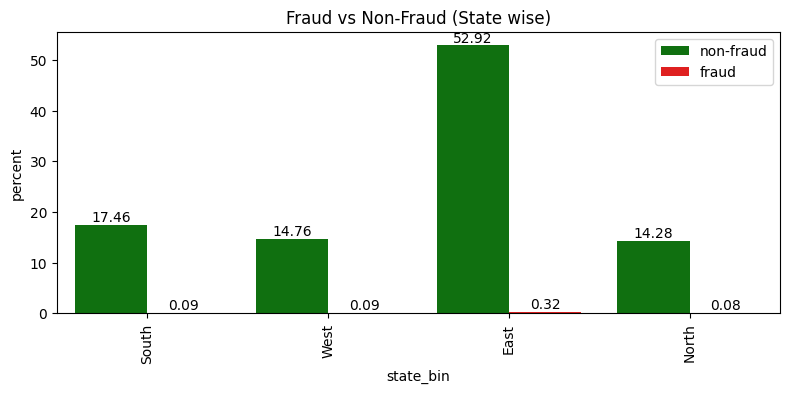

In [65]:
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.title("Fraud vs Non-Fraud (State wise)")
ax=sns.countplot(x=df_train["state_bin"],stat="percent",hue=df_train["is_fraud"],palette=['g','r'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["non-fraud","fraud"])
plt.tight_layout()
plt.show()

South region has comparitvely higher cases

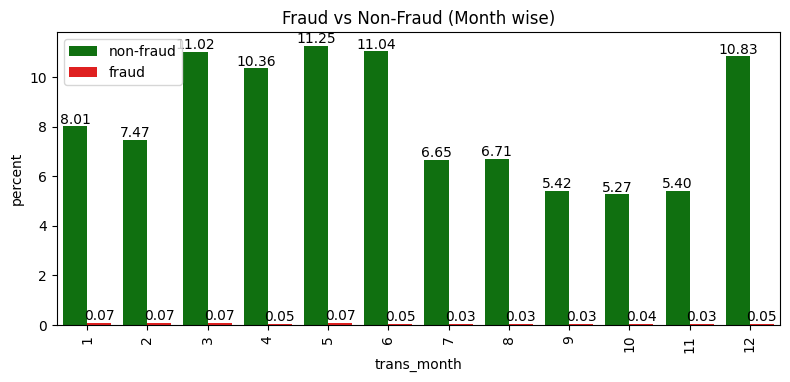

In [66]:
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.title("Fraud vs Non-Fraud (Month wise)")
ax=sns.countplot(x=df_train["trans_month"],stat="percent",hue=df_train["is_fraud"],palette=['g','r'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["non-fraud","fraud"])
plt.tight_layout()
plt.show()

No specific trend is seen in trans-month

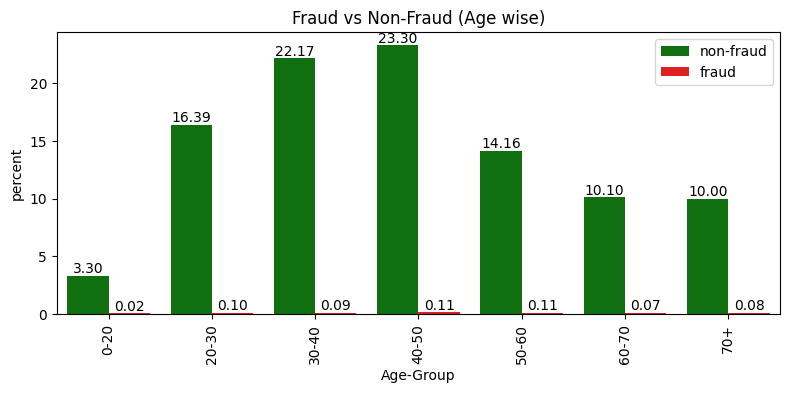

In [67]:
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.title("Fraud vs Non-Fraud (Age wise)")
ax=sns.countplot(x=df_train["Age-Group"],stat="percent",hue=df_train["is_fraud"],palette=['g','r'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["non-fraud","fraud"])
plt.tight_layout()
plt.show()

Age Group : 30-40 group customers have higher fraud transaction cases

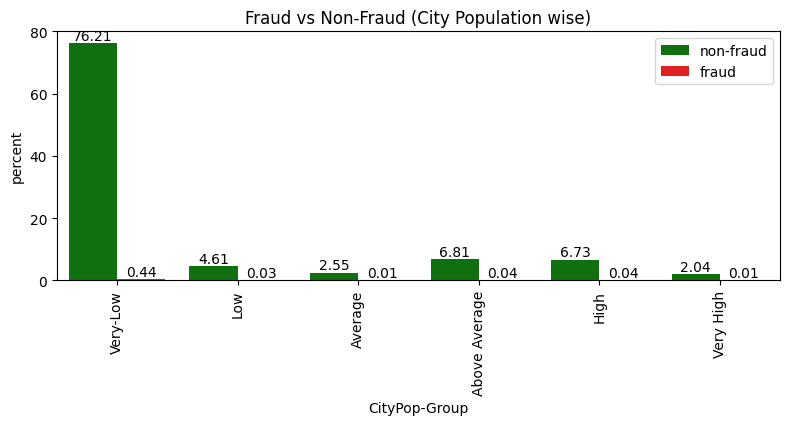

In [68]:
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.title("Fraud vs Non-Fraud (City Population wise)")
ax=sns.countplot(x=df_train["CityPop-Group"],stat="percent",hue=df_train["is_fraud"],palette=['g','r'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["non-fraud","fraud"])
plt.tight_layout()
plt.show()

City with Average population have higher cases comparitively

In [69]:
df_train.head()

,category,amt,gender,is_fraud,trans_month,trans_hour,state_bin,Age-Group,CityPop-Group
0,misc_net,4.97,F,0,1,0,South,30-40,Very-Low
1,grocery_pos,107.23,F,0,1,0,West,40-50,Very-Low
2,entertainment,220.11,M,0,1,0,West,50-60,Very-Low
3,gas_transport,45.00,M,0,1,0,West,50-60,Very-Low
4,misc_pos,41.96,M,0,1,0,East,30-40,Very-Low


In [70]:
df_train.columns

Index(['category', 'amt', 'gender', 'is_fraud', 'trans_month', 'trans_hour',
       'state_bin', 'Age-Group', 'CityPop-Group'],
      dtype='object')

In [71]:
num_cols

['amt', 'trans_month', 'trans_hour']

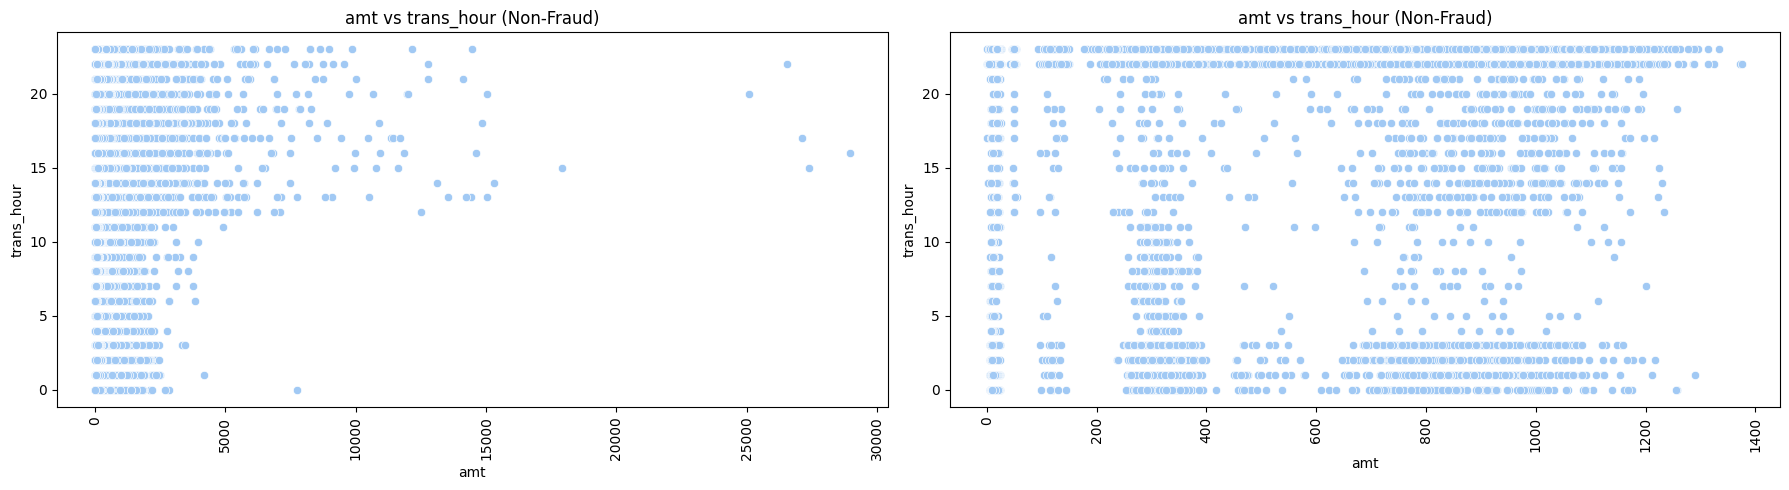

In [72]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("amt vs trans_hour (Non-Fraud)")
ax=sns.scatterplot(data =Non_fraud,x="amt",y="trans_hour",palette=['g'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("amt vs trans_hour (Non-Fraud)")
ax=sns.scatterplot(data =Fraud,x="amt",y="trans_hour",palette=['g'])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

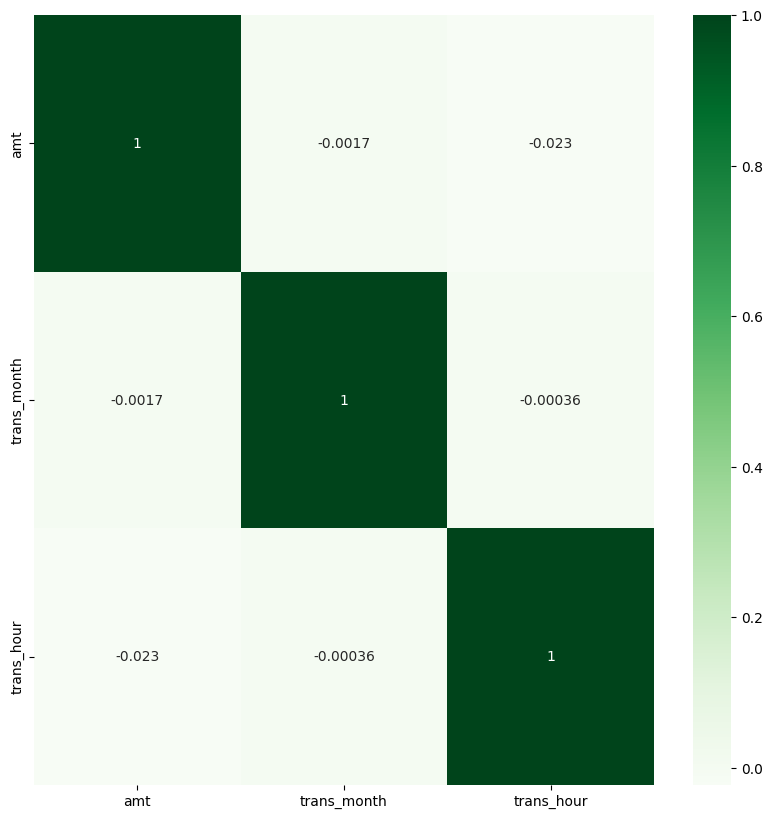

In [73]:
#heatmap for numerical columns
plt.figure(figsize=(10,10))
sns.heatmap(df_train[num_cols].corr(),annot=True, cmap='Greens')
plt.show()

In [74]:
#There is no multicollinearity between the variables

### STEP 5 : Data Preparation for Modelling

In [75]:
#Binary mapping for gender column
df_train['gender'] = df_train['gender'].map({'M': 1, 'F': 0})
df_test['gender'] = df_test['gender'].map({'M': 1, 'F': 0})

df_train.head()

,category,amt,gender,is_fraud,trans_month,trans_hour,state_bin,Age-Group,CityPop-Group
0,misc_net,4.97,0,0,1,0,South,30-40,Very-Low
1,grocery_pos,107.23,0,0,1,0,West,40-50,Very-Low
2,entertainment,220.11,1,0,1,0,West,50-60,Very-Low
3,gas_transport,45.00,1,0,1,0,West,50-60,Very-Low
4,misc_pos,41.96,1,0,1,0,East,30-40,Very-Low


In [76]:
print(df_train.shape)
print(df_test.shape)

(1296675, 9)
(555719, 9)


In [77]:
# Encoding using Dummy Variable Creation for categorical variable
df_train=pd.get_dummies(data=df_train,columns=['category', 'state_bin', 'Age-Group', 'CityPop-Group'],drop_first=True,dtype=int)


In [78]:
df_test=pd.get_dummies(data=df_test,columns=['category', 'state_bin', 'Age-Group', 'CityPop-Group'],drop_first=True,dtype=int)

In [79]:
df_test.shape

(555719, 32)

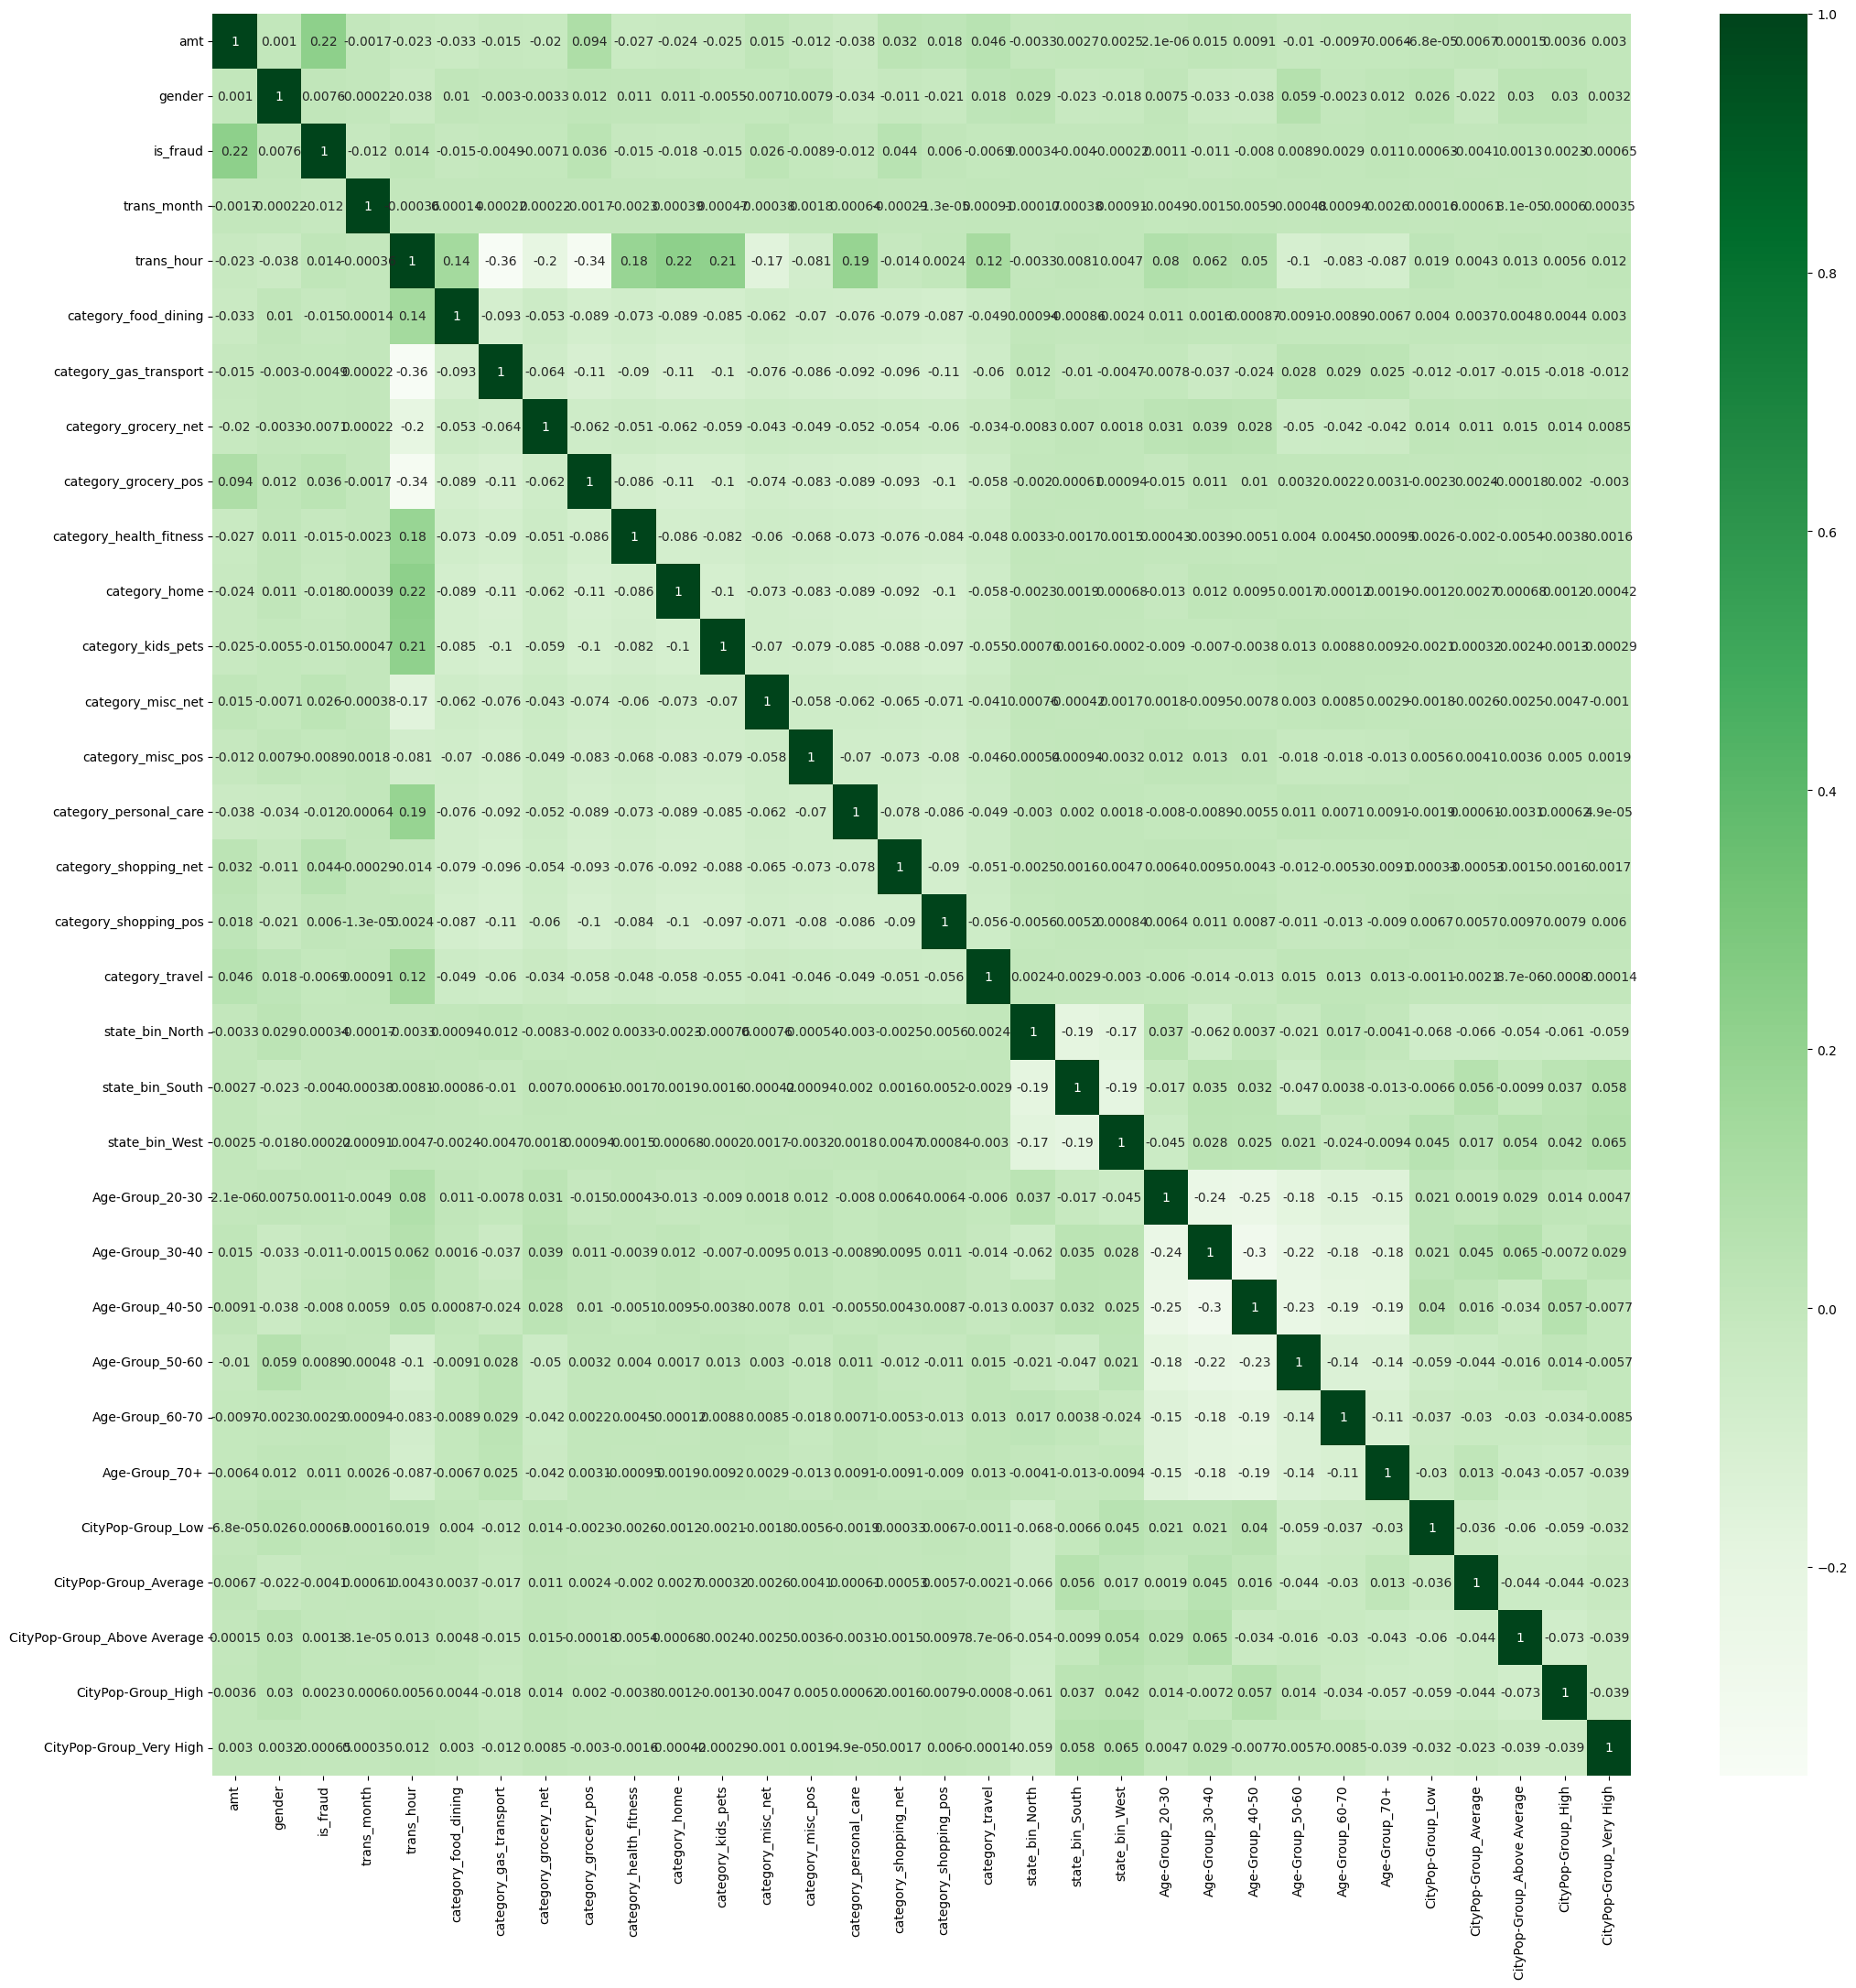

In [80]:
# To understand the multicollineartiy between variables
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

###STEP 6: Modelling

**Model building on imbalanced data:**
 * As the data is heavily balanced and skewed, We should consider consider Recall, ROC-AUC score, Positive Prediction Score and F1-Score as our evaluation metrics.
 * Accuracy is not alone sufficient in this case because we have to find correct fraud case where the data is highly imabalanced



In [81]:
# Putting predictor variables to X
X_train = df_train.drop('is_fraud', axis=1)
# Putting Target variables to y
y_train = df_train["is_fraud"]

# Putting predictor variables to X
X_test = df_test.drop('is_fraud', axis=1)
# Putting Target variables to y
y_test = df_test["is_fraud"]

# importing the library for Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['amt','trans_month','trans_hour']] = scaler.fit_transform(X_train[['amt','trans_month','trans_hour']])
X_test[['amt','trans_month','trans_hour']] = scaler.transform(X_test[['amt','trans_month','trans_hour']])

In [82]:
# StratifiedK fold implementation on datasets for tackling imbalance in datasets
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)

for train_idx, test_idx in skf.split(X_train, y_train):
    X_train_str, X_val_str = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_str, y_val_str =  y_train.iloc[train_idx],  y_train.iloc[test_idx]

In [83]:
#Using SMOTE and ADASYN techniques for creating synthetic points for balancing data
import collections
from collections import Counter
print("Before SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train_str).items())))

# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=30, k_neighbors=4)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train_str, y_train_str)
print("After SMOTE, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_smt).items())))
print(len(X_resampled_smt))

Before SMOTE, counts of label '0'&'1': [(0, 1031336), (1, 6004)] 

After SMOTE, counts of label '0'&'1': [(0, 1031336), (1, 1031336)]
2062672


In [84]:
# ADASYN
import collections
from collections import Counter
print("Before ADASYN, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train_str).items())))
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=30, n_neighbors=4)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train_str, y_train_str)
print("After ADASYN, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_ada).items())))
print(len(X_resampled_ada))

Before ADASYN, counts of label '0'&'1': [(0, 1031336), (1, 6004)] 

After ADASYN, counts of label '0'&'1': [(0, 1031336), (1, 1032040)]
2063376


#### Logistic Regression

In [85]:
# Building the model
# Here we are experimenting with adasyn dataset with logistic regresssion
lr_model = LogisticRegression()
# Training the model
lr_model.fit(X_resampled_ada, y_resampled_ada)

LogisticRegression()

In [86]:
# Predictions
y_val_pred = lr_model.predict(X_val_str)
print(f"Validation Fold Classification Report:\n{classification_report(y_val_str, y_val_pred)}")

y_test_pred = lr_model.predict(X_test)
print(f"Test Classification Report:\n{classification_report(y_test, y_test_pred)}")


# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Fold Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85    257833
           1       0.02      0.81      0.04      1502

    accuracy                           0.75    259335
   macro avg       0.51      0.78      0.44    259335
weighted avg       0.99      0.75      0.85    259335

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    553574
           1       0.01      0.76      0.03      2145

    accuracy                           0.79    555719
   macro avg       0.51      0.77      0.45    555719
weighted avg       1.00      0.79      0.88    555719

Accuracy: 0.7851414113967671
Confusion Matrix:
 [[434687 118887]
 [   514   1631]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88    553574
           1       0.01      0.76      0.03      2145

    accu

In [87]:
confusion_lr= confusion_matrix( y_test, y_test_pred)

TN = confusion_lr[0,0] # true negatives
TP = confusion_lr[1,1] # true positives
FP = confusion_lr[0,1] # false positives
FN = confusion_lr[1,0] # false negatives

print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  76.0%
Specificity:  78.5%
False postive rate: 21.5%
Positive predictive value: 1.4%
Negative predictive value: 99.9%


Accuracy:  78.5%
F1 score:  2.7%
Recall:  76.0%
Precision:  1.4%
ROC for the test dataset: 86.7%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88    553574
           1       0.01      0.76      0.03      2145

    accuracy                           0.79    555719
   macro avg       0.51      0.77      0.45    555719
weighted avg       1.00      0.79      0.88    555719



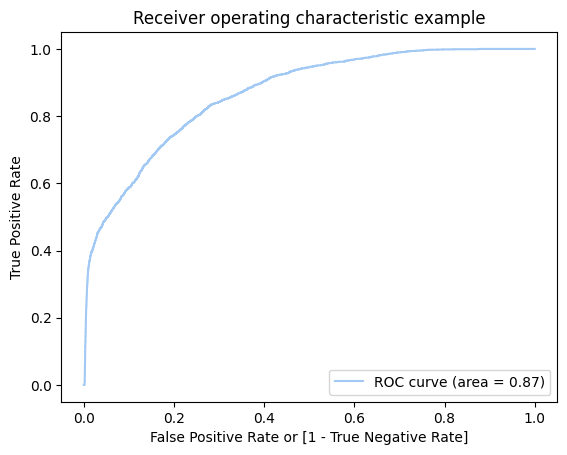


 Confussion Matrix:
 [[434687 118887]
 [   514   1631]]


In [88]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred)))
pred_probs_test = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred))

#### Decision Tree

##### SMOTE

In [89]:
dt_base_smt = DecisionTreeClassifier( max_depth=10, min_samples_split=100, min_samples_leaf=100, random_state=30,class_weight='balanced')

In [90]:
dt_base_smt.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=100, min_samples_split=100,
                       random_state=30)

In [91]:
y_train_pred_smt = dt_base_smt.predict(X_resampled_smt)
y_test_pred_smt = dt_base_smt.predict(X_test)

In [92]:
print(classification_report( y_resampled_smt, y_train_pred_smt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97   1031336
           1       0.97      0.98      0.97   1031336

    accuracy                           0.97   2062672
   macro avg       0.97      0.97      0.97   2062672
weighted avg       0.97      0.97      0.97   2062672



Accuracy:  96.7%
F1 score:  18.0%
Recall:  94.8%
Precision:  10.0%
ROC for the test dataset: 97.9%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.10      0.95      0.18      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.96      0.58    555719
weighted avg       1.00      0.97      0.98    555719



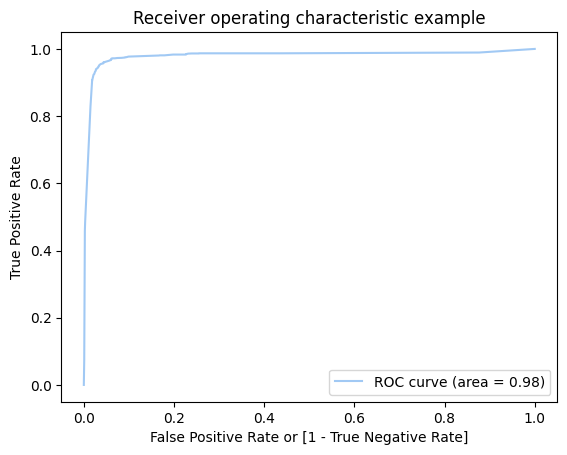


 Confussion Matrix:
 [[535183  18391]
 [   112   2033]]


In [93]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_smt)))
pred_probs_test = dt_base_smt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_smt))

In [94]:
confusion_dt_smt= confusion_matrix( y_test, y_test_pred_smt)

TN = confusion_dt_smt[0,0] # true negatives
TP = confusion_dt_smt[1,1] # true positives
FP = confusion_dt_smt[0,1] # false positives
FN = confusion_dt_smt[1,0] # false negatives

print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  94.8%
Specificity:  96.7%
False postive rate: 3.3%
Positive predictive value: 10.0%
Negative predictive value: 100.0%


#### ADASYN

In [95]:
dt_base_ada = DecisionTreeClassifier( max_depth=8, max_features=12, min_samples_leaf=200, random_state=30,class_weight='balanced')

In [96]:
dt_base_ada.fit(X_resampled_ada, y_resampled_ada)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_features=12,
                       min_samples_leaf=200, random_state=30)

In [97]:
y_train_pred_ada = dt_base_ada.predict(X_resampled_ada)
y_test_pred_ada = dt_base_ada.predict(X_test)

In [98]:
print(classification_report( y_resampled_ada, y_train_pred_ada))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92   1031336
           1       0.92      0.92      0.92   1032040

    accuracy                           0.92   2063376
   macro avg       0.92      0.92      0.92   2063376
weighted avg       0.92      0.92      0.92   2063376



Accuracy:  92.4%
F1 score:  8.7%
Recall:  93.0%
Precision:  4.5%
ROC for the test dataset: 97.2%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.05      0.93      0.09      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.93      0.52    555719
weighted avg       1.00      0.92      0.96    555719



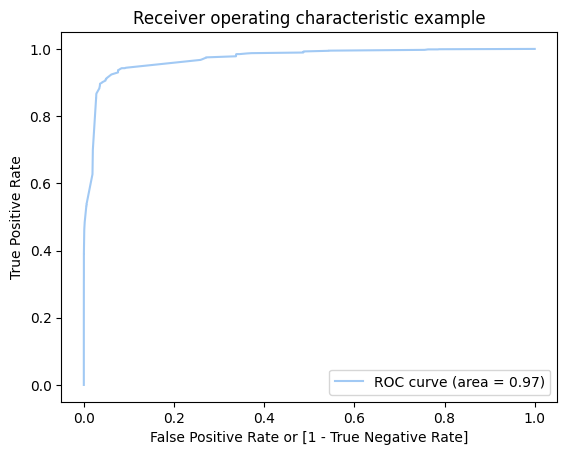


 Confussion Matrix:
 [[511590  41984]
 [   150   1995]]


In [99]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_ada)))
pred_probs_test = dt_base_ada.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_ada))

In [100]:
confusion_dt_smt = metrics.confusion_matrix( y_test, y_test_pred_ada)

TN = confusion_dt_smt[0,0] # true negatives
TP = confusion_dt_smt[1,1] # true positives
FP = confusion_dt_smt[0,1] # false positives
FN = confusion_dt_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  93.0%
Specificity:  92.4%
False postive rate: 7.6%
Positive predictive value: 4.5%
Negative predictive value: 100.0%


Decision Tree - Hypertuning
 * used max_depth, min_samples_leaf,min_samples_split

In [101]:
dt = DecisionTreeClassifier(random_state=30)


In [102]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,15],
     }

In [103]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           verbose=1,
                            cv=4,
                            n_jobs=-1,
                            scoring="accuracy")

In [104]:
%%time
grid_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
CPU times: user 23.6 s, sys: 1.84 s, total: 25.4 s
Wall time: 7min 23s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 15]},
             scoring='accuracy', verbose=1)

In [105]:
grid_search.best_score_

0.9091343655220026

In [106]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       random_state=30)

In [107]:
y_train_pred_dt_hp_smt = dt_best.predict(X_resampled_smt)
y_test_pred_dt_hp_smt = dt_best.predict(X_test)

In [108]:
print(classification_report(y_resampled_smt, y_train_pred_dt_hp_smt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97   1031336
           1       0.97      0.98      0.98   1031336

    accuracy                           0.98   2062672
   macro avg       0.98      0.98      0.98   2062672
weighted avg       0.98      0.98      0.98   2062672



Accuracy:  96.7%
F1 score:  18.0%
Recall:  94.2%
Precision:  9.9%
ROC for the test dataset: 96.9%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.10      0.94      0.18      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.95      0.58    555719
weighted avg       1.00      0.97      0.98    555719



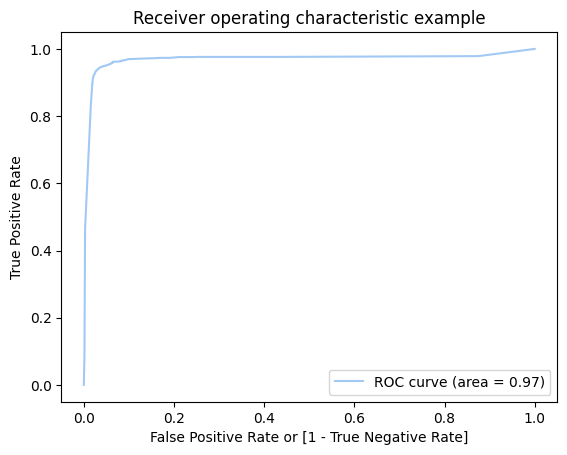


 Confusion Matrix:
 [[535277  18297]
 [   124   2021]]


In [109]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_hp_smt)))
pred_probs_test = dt_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_dt_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confusion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_hp_smt))

In [110]:
confusion_dt_hp_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_hp_smt)

TN = confusion_dt_hp_smt[0,0] # true negatives
TP = confusion_dt_hp_smt[1,1] # true positives
FP = confusion_dt_hp_smt[0,1] # false positives
FN = confusion_dt_hp_smt[1,0] # false negatives


print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))


print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))


print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  94.2%
Specificity:  96.7%
False postive rate: 3.3%
Positive predictive value: 9.9%
Negative predictive value: 100.0%


In [111]:
dt_best.feature_importances_

array([7.34992841e-01, 4.52140444e-03, 1.74893471e-03, 8.29749865e-02,
       9.73407169e-03, 8.41079866e-02, 2.44190133e-02, 3.14071974e-03,
       2.17629252e-03, 8.66684800e-03, 5.74557900e-03, 0.00000000e+00,
       1.39089699e-02, 5.70883291e-03, 2.99079655e-04, 0.00000000e+00,
       1.24364245e-02, 9.25514570e-05, 5.23295927e-05, 4.16066266e-04,
       6.00725932e-04, 1.06611695e-03, 1.26352171e-03, 9.36681807e-04,
       4.53851467e-04, 2.90134813e-04, 1.31361970e-07, 3.12757479e-05,
       8.91231201e-05, 1.25464731e-04, 4.04670012e-08])

In [112]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": dt_best.feature_importances_
})

In [113]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(15)

,Varname,Imp
0,amt,0.734993
5,category_gas_transport,0.084108
3,trans_hour,0.082975
6,category_grocery_net,0.024419
12,category_misc_pos,0.013909
16,category_travel,0.012436
4,category_food_dining,0.009734
9,category_home,0.008667
10,category_kids_pets,0.005746
13,category_personal_care,0.005709


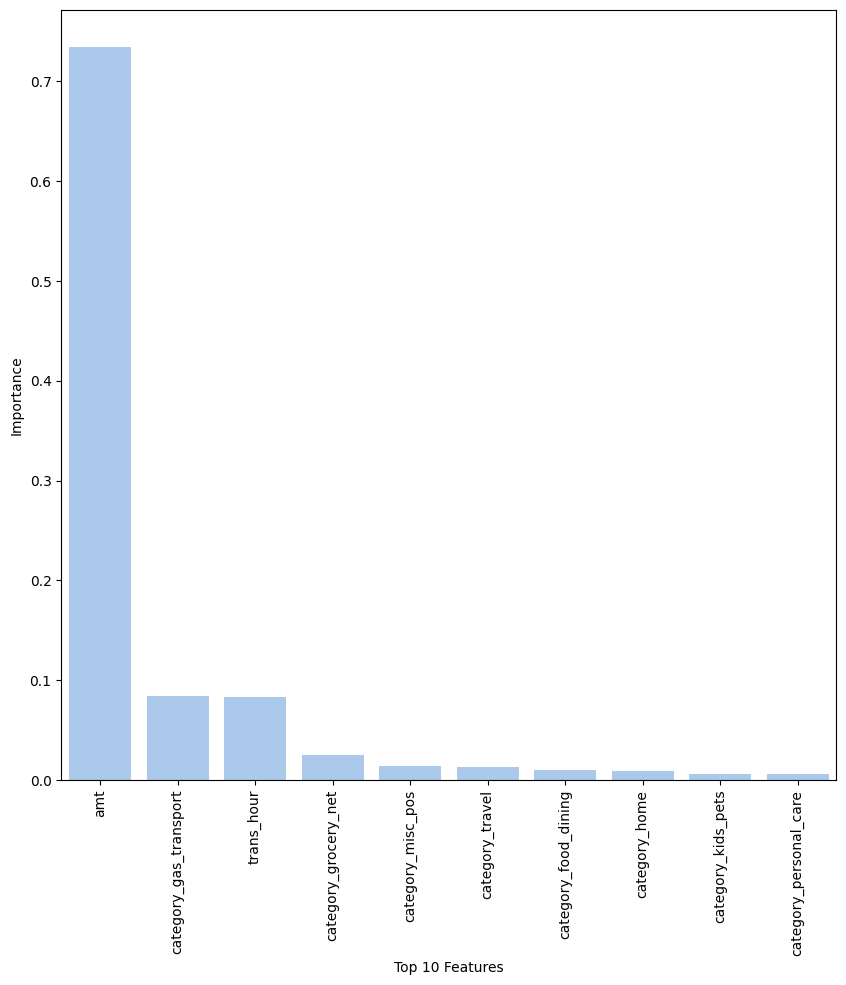

In [114]:
# Plotting important feature
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

#### Random Forest

#### SMOTE

In [115]:
rf_smt = RandomForestClassifier(n_estimators=12, max_depth=15, max_features='sqrt', min_samples_leaf=30, random_state=30, oob_score=True,class_weight='balanced')

In [116]:
%%time
rf_smt.fit(X_resampled_smt, y_resampled_smt)

CPU times: user 50.4 s, sys: 754 ms, total: 51.2 s
Wall time: 51.6 s


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=30, n_estimators=12, oob_score=True,
                       random_state=30)

In [117]:
rf_smt.oob_score_

0.9729864951868257

In [118]:
y_train_pred_rf_smt = rf_smt.predict(X_resampled_smt)
y_test_pred_rf_smt = rf_smt.predict(X_test)

In [119]:
print(classification_report(y_resampled_smt, y_train_pred_rf_smt))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1031336
           1       0.99      0.97      0.98   1031336

    accuracy                           0.98   2062672
   macro avg       0.98      0.98      0.98   2062672
weighted avg       0.98      0.98      0.98   2062672



Accuracy:  98.9%
F1 score:  39.2%
Recall:  88.1%
Precision:  25.2%
ROC for the test dataset: 98.9%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.25      0.88      0.39      2145

    accuracy                           0.99    555719
   macro avg       0.63      0.94      0.69    555719
weighted avg       1.00      0.99      0.99    555719



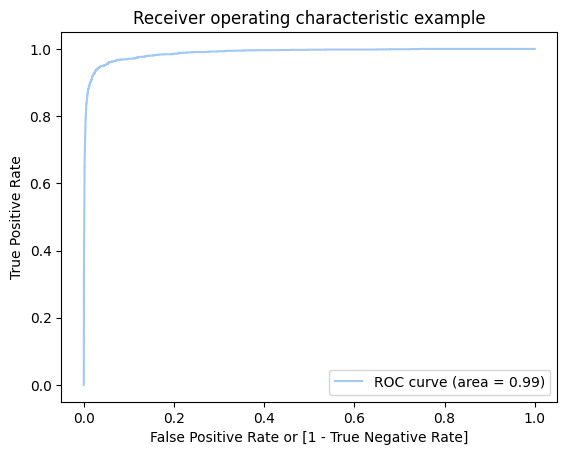


 Confussion Matrix:
 [[547974   5600]
 [   255   1890]]


In [120]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_smt)))
pred_probs_test = rf_smt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_rf_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_smt))

In [121]:
confusion_rf_smt= confusion_matrix( y_test, y_test_pred_rf_smt)

TN = confusion_rf_smt[0,0] # true negatives
TP = confusion_rf_smt[1,1] # true positives
FP = confusion_rf_smt[0,1] # false positives
FN = confusion_rf_smt[1,0] # false negatives

print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  88.1%
Specificity:  99.0%
False postive rate: 1.0%
Positive predictive value: 25.2%
Negative predictive value: 100.0%


#### ADASYN

In [122]:
rf_ada = RandomForestClassifier(n_estimators=12, max_depth=15, max_features='sqrt', min_samples_leaf=30, random_state=30, oob_score=True,class_weight='balanced')

In [123]:
%%time
rf_ada.fit(X_resampled_ada, y_resampled_ada)

CPU times: user 40.2 s, sys: 813 ms, total: 41 s
Wall time: 41.2 s


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=30, n_estimators=12, oob_score=True,
                       random_state=30)

In [124]:
rf_ada.oob_score_

0.9598536573072479

In [125]:
y_train_pred_rf_ada = rf_ada.predict(X_resampled_ada)
y_test_pred_rf_ada = rf_ada.predict(X_test)

In [126]:
print(y_train_pred_rf_ada.shape)
print(y_test_pred_rf_ada.shape)

(2063376,)
(555719,)


In [127]:
print(classification_report(y_resampled_ada, y_train_pred_rf_ada))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97   1031336
           1       0.97      0.97      0.97   1032040

    accuracy                           0.97   2063376
   macro avg       0.97      0.97      0.97   2063376
weighted avg       0.97      0.97      0.97   2063376



Accuracy:  97.2%
F1 score:  20.0%
Recall:  91.0%
Precision:  11.3%
ROC for the test dataset: 98.7%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.11      0.91      0.20      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.94      0.59    555719
weighted avg       1.00      0.97      0.98    555719



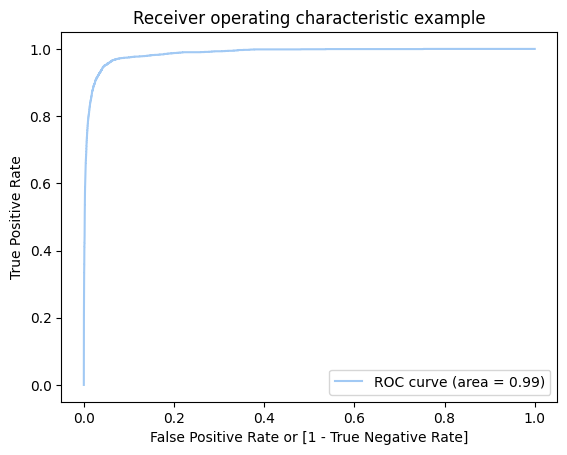


 Confussion Matrix:
 [[538177  15397]
 [   192   1953]]


In [128]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_ada)))
pred_probs_test = rf_ada.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_rf_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_ada))

In [129]:
confusion_rf_ada= confusion_matrix( y_test, y_test_pred_rf_ada)

TN = confusion_rf_ada[0,0] # true negatives
TP = confusion_rf_ada[1,1] # true positives
FP = confusion_rf_ada[0,1] # false positives
FN = confusion_rf_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  91.0%
Specificity:  97.2%
False postive rate: 2.8%
Positive predictive value: 11.3%
Negative predictive value: 100.0%


Summary:
Modelling Techniques Performed: Logistics Regression with ADASYN sample, Decision Trees with SMOTE and ADASYN Sample, Hypertuned Decision Trees with SMOTE sample, Random Forest Classifier with SMOTE and ADASYN sample.
After performing various modelling technique , we conclude Random Forest Classifier with SMOTE sampling works better with better Positive prediction value and Recall values.
So choosing Random Forest SMOTE analysis for Cost-Benefit Analysis

### Cost- Benefit Analysis

In [130]:
rf_smt.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=30, n_estimators=12, oob_score=True,
                       random_state=30)

In [131]:
y_train_pred_f = rf_smt.predict(X_train)
y_test_pred_f= rf_smt.predict(X_test)

In [132]:
print(classification_report(y_train, y_train_pred_f))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1289169
           1       0.29      0.97      0.45      7506

    accuracy                           0.99   1296675
   macro avg       0.65      0.98      0.72   1296675
weighted avg       1.00      0.99      0.99   1296675



In [133]:
print('\n Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred_f))
print(classification_report(y_train, y_train_pred_f))


 Confusion Matrix:
 [[1271487   17682]
 [    249    7257]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1289169
           1       0.29      0.97      0.45      7506

    accuracy                           0.99   1296675
   macro avg       0.65      0.98      0.72   1296675
weighted avg       1.00      0.99      0.99   1296675



In [134]:
confusion_rf_smt = confusion_matrix( y_test, y_test_pred_f)

TN = confusion_rf_smt[0,0] # true negatives
TP = confusion_rf_smt[1,1] # true positives
FP = confusion_rf_smt[0,1] # false positives
FN = confusion_rf_smt[1,0] # false negatives

print('True_Negatives:', TN)
print('True_Positives:', TP)
print('False_Positives:', FP)
print('False_Negatives:', FN)

True_Negatives: 546338
True_Positives: 1969
False_Positives: 7236
False_Negatives: 176


In [135]:
train_confusion_rf_smt = confusion_matrix(y_train ,y_train_pred_f)

TN = train_confusion_rf_smt[0,0] # true negatives
TP = train_confusion_rf_smt[1,1] # true positives
FP = train_confusion_rf_smt[0,1] # false positives
FN = train_confusion_rf_smt[1,0] # false negatives

print('True_Negatives for train data:', TN)
print('True_Positives for train data:', TP)
print('False_Positives for train data:', FP)
print('False_Negatives for train data:', FN)

True_Negatives for train data: 1271487
True_Positives for train data: 7257
False_Positives for train data: 17682
False_Negatives for train data: 249


In [136]:
cost_benefit_analysis = pd.concat([df_train1, df_test1], axis=0)
cost_benefit_analysis.shape

(1852394, 23)

In [137]:
cost_benefit_analysis1=cost_benefit_analysis[['trans_date_trans_time','is_fraud','cc_num','amt']]

In [138]:
#Average_number_of_transactions_per_month
a=cost_benefit_analysis1['trans_date_trans_time'].shape[0]/24
a

77183.08333333333

In [139]:
cost_benefit_analysis_fraud= cost_benefit_analysis1[cost_benefit_analysis1["is_fraud"]==1]

In [140]:
#Average_number_of_transactions_per_month
b=cost_benefit_analysis_fraud['trans_date_trans_time'].shape[0]/24
b

402.125

In [141]:
#Average_amount_per_fraud_transaction
c=sum(cost_benefit_analysis_fraud['amt'])/cost_benefit_analysis_fraud.shape[0]
c

530.6614122888789

In [149]:
# Average number of transactions per month detected as fraudulent by the model (TF)= TP+FP/24

a1=(1969+7236+7257+17682)/24
a1

1422.6666666666667

In [150]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)

a1*1.5

2134.0

In [151]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

(176+249)/24

17.708333333333332

In [152]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). c=530.661412288881

17.708*530.66

9396.927279999998

In [153]:
# Cost incurred per month after the model is built and deployed (4+6)

2134+9396.93

11530.93

In [147]:
# Cost incurred per month before the model was deployed (b*c)

b*c

213392.22041666543

In [154]:
# Final savings = Cost incurred before - Cost incurred after(1-7)
213392.2204-11530.63

201861.5904